<a href="https://colab.research.google.com/github/juliomestas/Ciencia_y_analitica_de_datos/blob/main/Actividad8RLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---

*   NOMBRE: -JULIO CESAR MESTAS DELGADO
*   MATRÍCULA: A01794827

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
DIR = "/content/drive/MyDrive/Documentos/Tec de Monterrey/MNA/Ciencia y analitica de datos/Semana 8"
os.chdir(DIR)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe.

In [6]:
desc_stats = insurance_df.describe()

print(desc_stats)

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


1b) Búsqueda de valores faltantes.

In [7]:
missing_values = insurance_df.isna().sum()
print(missing_values)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas.

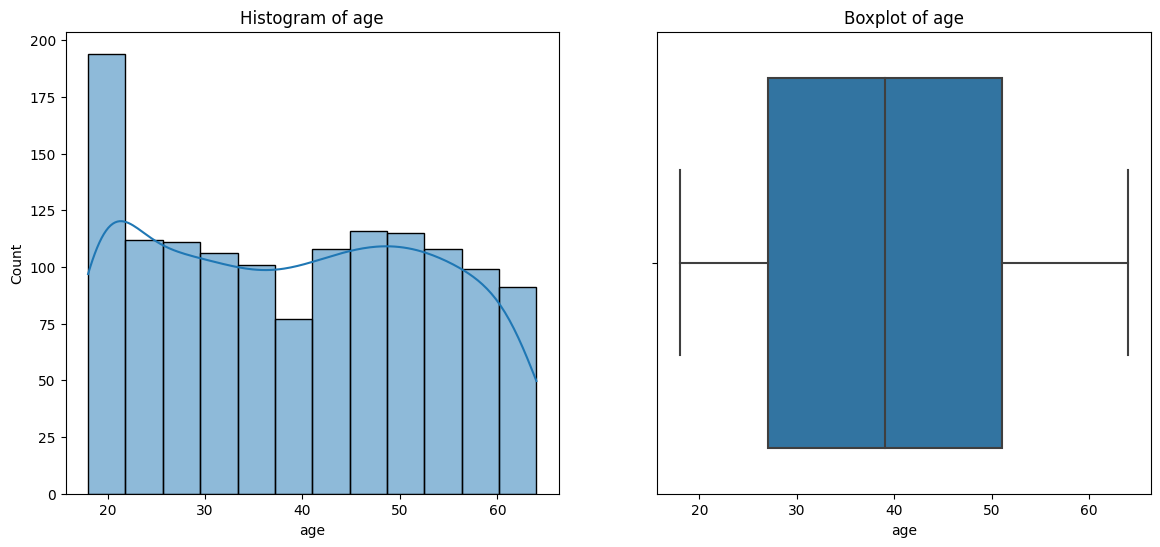

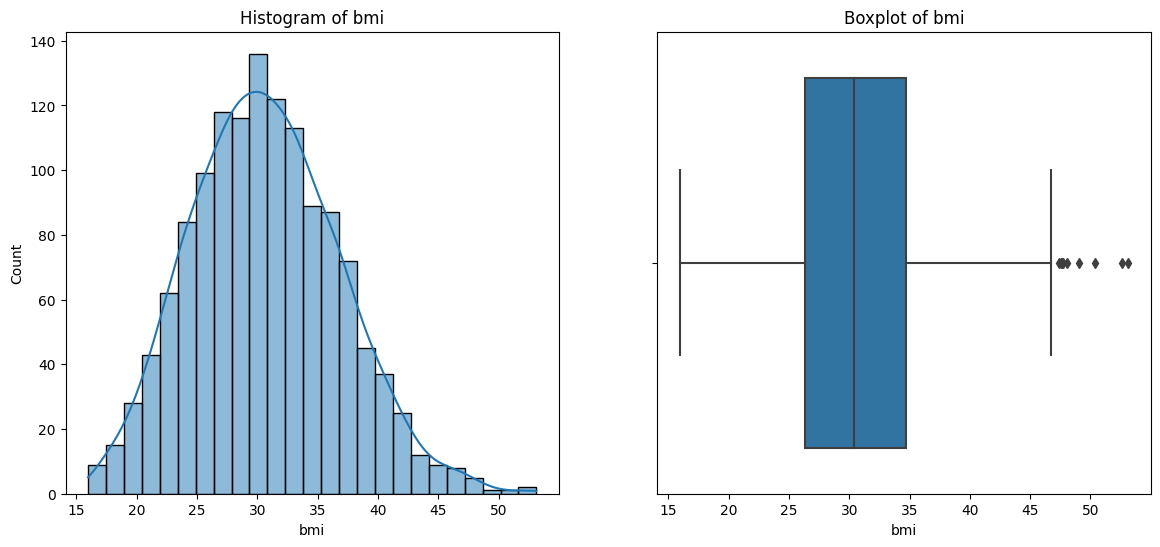

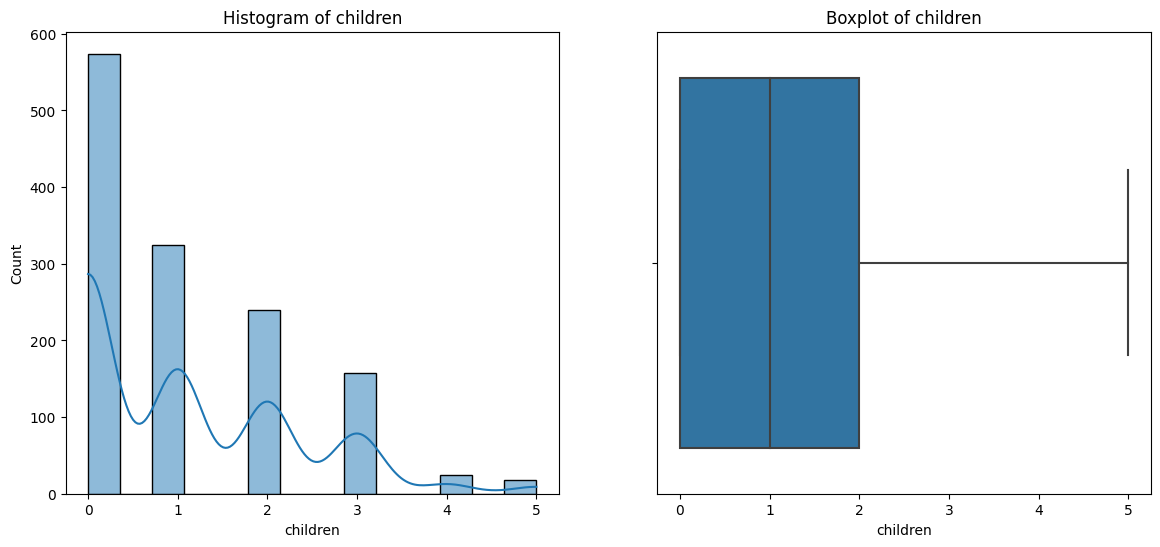

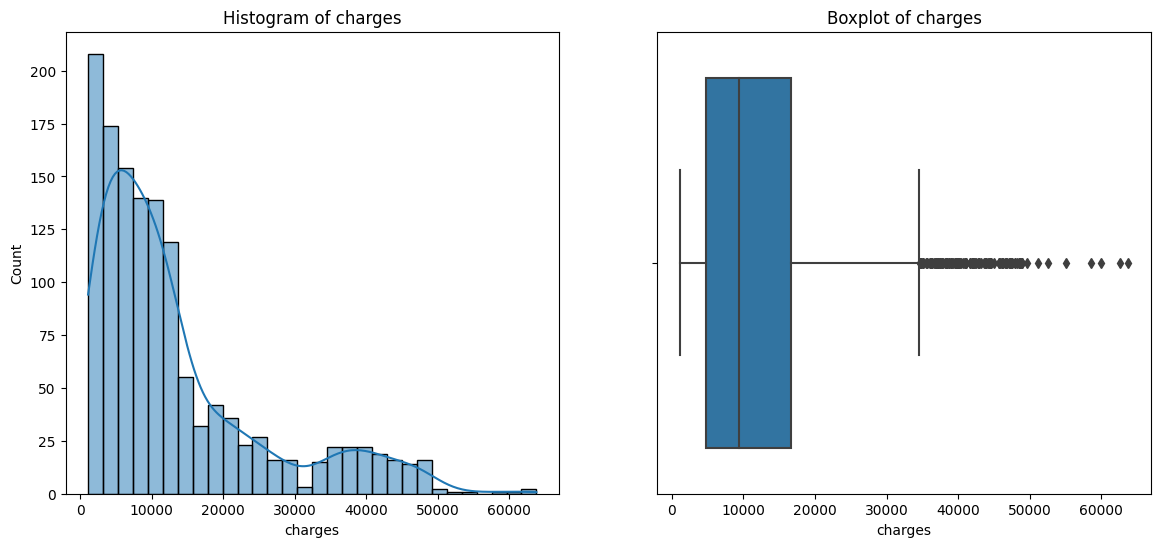

In [9]:
# Lista de variables cuantitativas
quant_vars = ['age', 'bmi', 'children', 'charges']

for var in quant_vars:
    plt.figure(figsize=(14, 6))

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(insurance_df[var], kde=True)
    plt.title(f'Histogram of {var}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=insurance_df[var])
    plt.title(f'Boxplot of {var}')

    plt.show()

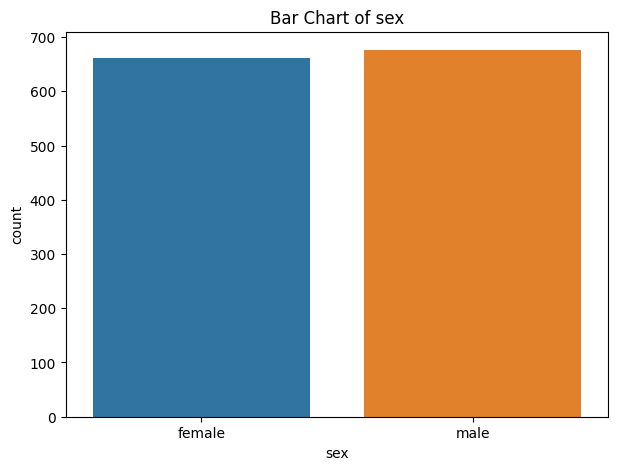

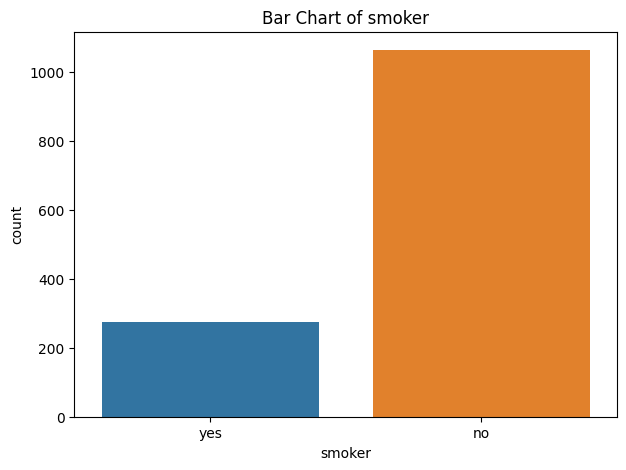

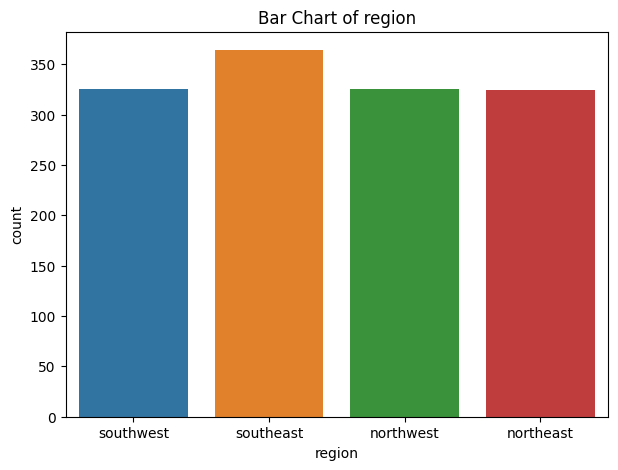

In [10]:
# Lista de variables categóricas
cat_vars = ['sex', 'smoker', 'region']

for var in cat_vars:
    plt.figure(figsize=(7, 5))
    sns.countplot(data=insurance_df, x=var)
    plt.title(f'Bar Chart of {var}')
    plt.show()

Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot.

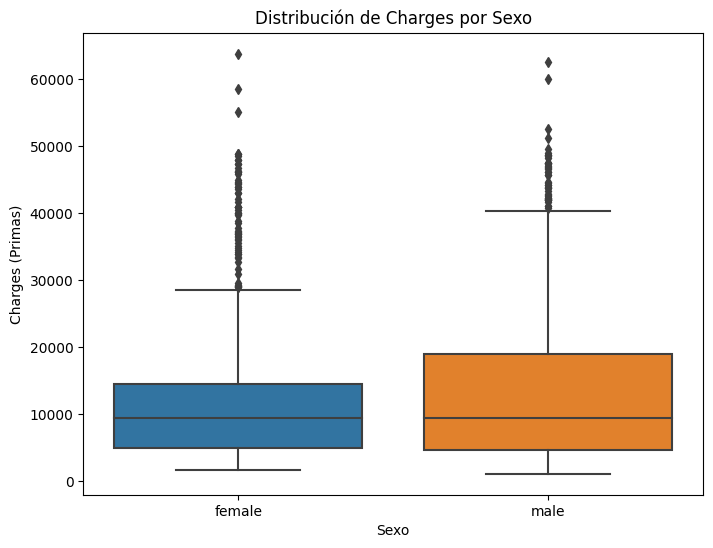

In [11]:

# Establecer el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Crear el boxplot
sns.boxplot(data=insurance_df, x='sex', y='charges')
plt.title('Distribución de Charges por Sexo')
plt.ylabel('Charges (Primas)')
plt.xlabel('Sexo')

plt.show()

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico?

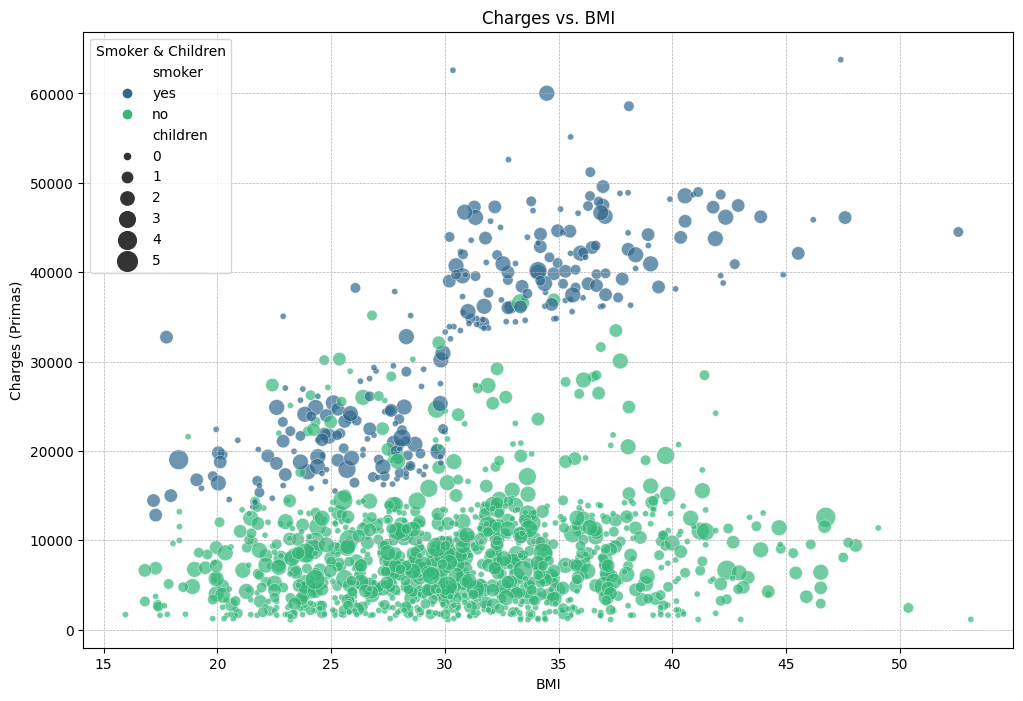

In [12]:
plt.figure(figsize=(12, 8))

# Crear el scatterplot
sns.scatterplot(data=insurance_df, x='bmi', y='charges', hue='smoker', size='children', sizes=(20, 200), palette='viridis', alpha=0.7)

plt.title('Charges vs. BMI')
plt.ylabel('Charges (Primas)')
plt.xlabel('BMI')
plt.legend(title='Smoker & Children')
plt.grid(True, which="both", ls="--", linewidth=0.5)

plt.show()

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas.

<ipython-input-13-0df9ba006607>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = insurance_df.corr()


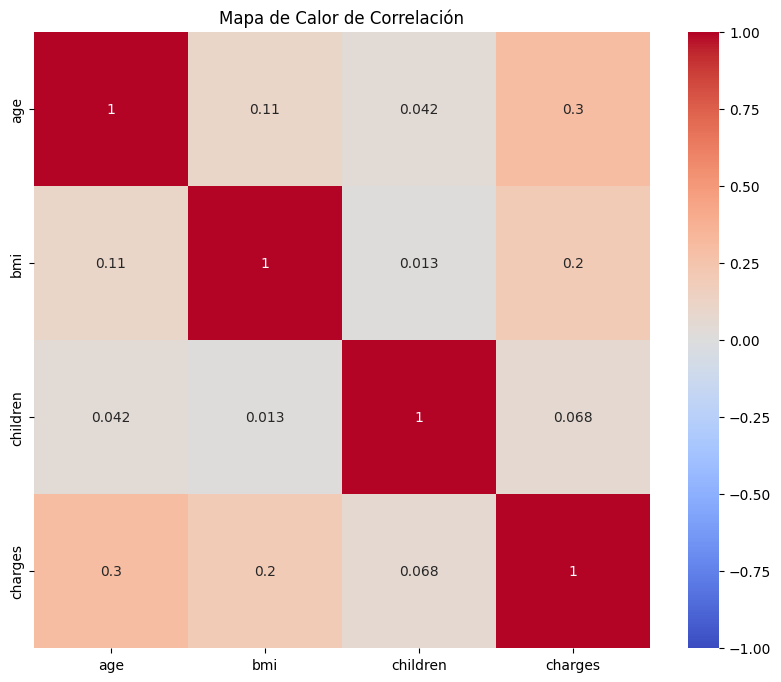

In [13]:
# Calcular la matriz de correlación
corr_matrix = insurance_df.corr()

plt.figure(figsize=(10, 8))

# Crear el mapa de calor
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)

plt.title('Mapa de Calor de Correlación')
plt.show()

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`.

3a) ¿Cuál es el promedio de `age` y de `bmi`?

In [14]:
# 1. Calcular el IQR para charges
Q1 = insurance_df['charges'].quantile(0.25)
Q3 = insurance_df['charges'].quantile(0.75)
IQR = Q3 - Q1

# 2. Identificar los valores atípicos
outliers_mask = (insurance_df['charges'] < (Q1 - 1.5 * IQR)) | (insurance_df['charges'] > (Q3 + 1.5 * IQR))

# 3. Crear un dataframe solo con estas observaciones
df_outliers = insurance_df[outliers_mask]

# 4. Calcular el promedio de age y bmi para estas observaciones
avg_age = df_outliers['age'].mean()
avg_bmi = df_outliers['bmi'].mean()

avg_age, avg_bmi

(41.07913669064748, 35.564604316546756)

3b) ¿Qué porcentaje de estas observaciones se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores?

In [15]:
# Porcentaje de observaciones correspondientes a hombres y mujeres
male_percentage = (df_outliers['sex'].value_counts()['male'] / len(df_outliers)) * 100
female_percentage = (df_outliers['sex'].value_counts()['female'] / len(df_outliers)) * 100

# Porcentaje de observaciones correspondientes a fumadores y no fumadores
smoker_percentage = (df_outliers['smoker'].value_counts()['yes'] / len(df_outliers)) * 100
non_smoker_percentage = (df_outliers['smoker'].value_counts()['no'] / len(df_outliers)) * 100

male_percentage, female_percentage, smoker_percentage, non_smoker_percentage

(64.02877697841727, 35.97122302158273, 97.84172661870504, 2.158273381294964)

# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`).

In [16]:
# Separar las variables
X = insurance_df.drop('charges', axis=1)
y = insurance_df['charges']

5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción.

In [17]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=X['smoker'], random_state=1)

6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

In [19]:
#transformador
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Identificar las columnas numéricas y categóricas
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

# Crear el transformador
preprocessing = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features) # drop='first' para evitar multicolinealidad
    ])


In [25]:
X_train_transformed = preprocessing.fit_transform(X_train)
print(X_train_transformed)


[[0.5        0.13672036 0.2        ... 0.         1.         0.        ]
 [0.10869565 0.92427372 0.2        ... 0.         1.         0.        ]
 [0.23913043 0.25375189 0.         ... 1.         0.         0.        ]
 ...
 [0.95652174 0.44471981 0.6        ... 1.         0.         0.        ]
 [0.2826087  0.35784111 0.         ... 0.         1.         0.        ]
 [0.34782609 0.45256781 0.2        ... 0.         0.         0.        ]]


In [24]:
X_test_transformed = preprocessing.transform(X_test)
print(X_test_transformed)

[[0.93478261 0.18835192 0.         ... 0.         0.         0.        ]
 [0.30434783 0.21437423 0.         ... 0.         0.         1.        ]
 [0.7826087  0.19881592 0.         ... 0.         0.         0.        ]
 ...
 [0.13043478 0.2328239  0.         ... 0.         0.         0.        ]
 [0.84782609 0.30634724 0.2        ... 0.         1.         0.        ]
 [0.80434783 0.2354399  0.6        ... 0.         0.         0.        ]]


# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`.

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 1. Creación del pipeline y entrenamiento del modelo
pipeline = Pipeline([
    ('preprocessor', preprocessing),
    ('regressor', LinearRegression())
])

# Entrenar el modelo
lr_model = pipeline.fit(X_train, y_train)

# 2. Evaluación del modelo en el conjunto de prueba
y_pred = lr_model.predict(X_test)

# Calcular RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Calcular R^2
r2 = r2_score(y_test, y_pred)

rmse, r2

(5698.759784532356, 0.7538547215244324)

**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`.


In [27]:
# 1. Calcular los límites para identificar y reemplazar outliers

# Calcular Q1, Q3 y IQR para y_train
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1

# Límite superior para reemplazar outliers
upper_bound = Q3 + 1.5 * IQR

# Reemplazar outliers en y_train y y_test con el límite superior
y_train = y_train.apply(lambda x: upper_bound if x > upper_bound else x)
y_test = y_test.apply(lambda x: upper_bound if x > upper_bound else x)

# 2. Aplicar las mismas transformaciones y entrenar el modelo nuevamente

# Crear y entrenar el pipeline (lr_model2)
lr_model2 = pipeline.fit(X_train, y_train)

# 3. Evaluar el nuevo modelo

# Predecir en el conjunto de prueba
y_pred2 = lr_model2.predict(X_test)

# Calcular RMSE y R^2 para el nuevo modelo
rmse2 = mean_squared_error(y_test, y_pred2, squared=False)
r2_2 = r2_score(y_test, y_pred2)

rmse2, r2_2

(4995.027100717612, 0.7605675404609118)

9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`.

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

In [28]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# 1. Crear el transformador preprocessing2

# Identificar las columnas numéricas y categóricas (ya lo hicimos anteriormente)
numeric_features = ['age', 'bmi', 'children']
categorical_features = ['sex', 'smoker', 'region']

preprocessing2 = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),          # Escalamiento estándar
        ('cat', OrdinalEncoder(), categorical_features)       # Codificación ordinal
    ])

# 2. Crear un pipeline con preprocessing2 y regresión lineal

pipeline2 = Pipeline([
    ('preprocessor', preprocessing2),
    ('regressor', LinearRegression())
])

# 3. Entrenar el modelo lr_model3 usando el nuevo pipeline
# Nota: Estamos usando y_train y X_train, que ya fueron modificados previamente (outliers reemplazados)

lr_model3 = pipeline2.fit(X_train, y_train)

In [31]:
lr_model3

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'bmi', 'children']),
                                                 ('cat', OrdinalEncoder(),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', LinearRegression())])

10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

In [29]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Variables para guardar el mejor modelo y el menor RMSE
best_degree = 0
best_rmse = float('inf')
best_model = None

# 2. Iterar sobre varios grados
for degree in range(1, 5):  # Probaremos grados del 1 al 4, puedes ajustar este rango si es necesario
    # Crear un pipeline que primero crea características polinómicas y luego aplica la regresión lineal
    model = make_pipeline(preprocessing2, PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    y_pred_temp = model.predict(X_test)

    rmse_temp = mean_squared_error(y_test, y_pred_temp, squared=False)

    if rmse_temp < best_rmse:
        best_rmse = rmse_temp
        best_degree = degree
        best_model = model

# 3. Entrena el modelo final con el mejor grado
lr_model4 = best_model

best_degree, best_rmse  # Esto te mostrará el mejor grado y su RMSE correspondiente

(2, 4384.469172579079)